In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [53]:
s=14 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [54]:
root_dir = '../../data/subtlety_playfight_data/'

In [55]:
df = pd.read_csv(f'{root_dir}curvefit_traits_merged_linearpf_withPC1.csv',index_col=[0])

In [56]:
df.columns

Index(['index', 'subID', 'r_squared_subt', 'nrmse_subt', 'aic_subt', 'center',
       'PSE_subt', 'sigma_subt', 'bias_xmin_subt', 'bias_xmax_subt',
       'bias_lower_subt', 'bias_upper_subt', 'flipped_subt', 'range_subt',
       'bias_subt', 'r_squared_pf', 'nrmse_pf', 'aic_pf', 'PSE_pf', 'slope_pf',
       'intercept', 'bias_xmin_pf', 'bias_xmax_pf', 'bias_lower_pf',
       'bias_upper_pf', 'flipped_pf', 'range_pf', 'bias_pf', 'social_skill',
       'attn_switch', 'img', 'attn_to_det', 'comm', 'posAffect', 'negAffect',
       'neuroticism', 'extraversion', 'openness', 'agreeableness',
       'conscientiousness', 'loneliness', 'nfriends', 'PC1'],
      dtype='object')

In [57]:
type(int(np.where(df.columns=='social_skill')[0][0]+6))

int

In [58]:
# AQ_total = df[df.columns[np.where(df.columns=='social_skill')[0][0]:np.where(df.columns=='social_skill')[0][0]+5]].sum(axis=1)
# loc = int(np.where(df.columns=='social_skill')[0][0]+6)
# df.insert(loc,'AQ_total',AQ_total)
# df

In [59]:
traits = df.columns[np.where(df.columns=='social_skill')[0][0]:-1]
traits

Index(['social_skill', 'attn_switch', 'img', 'attn_to_det', 'comm',
       'posAffect', 'negAffect', 'neuroticism', 'extraversion', 'openness',
       'agreeableness', 'conscientiousness', 'loneliness', 'nfriends'],
      dtype='object')

In [60]:
from pymer4.models import Lmer,Lm

In [61]:
# # trait = traits[0]
# m1 = Lm(f'{trait} ~ PSE_subt*range_subt + PSE_subt*bias_subt + PSE_subt*sigma_subt + range_subt*bias_subt + range_subt*sigma_subt + bias_subt*sigma_subt', data=df) # ff: anglesm rfx: subject ID
# m1.fit()

# comparison 1 (main + interaction effects)

In [75]:
all_AICs = np.full((traits.shape[0],3),np.nan)
for i,trait in enumerate(traits):
    # trait = traits[i]
    m1 = Lm(f'{trait} ~ PSE_subt*range_subt + PSE_subt*bias_subt + PSE_subt*sigma_subt + range_subt*bias_subt + range_subt*sigma_subt + bias_subt*sigma_subt', data=df) # ff: anglesm rfx: subject ID
    m1.fit(summary=False)
    all_AICs[i,0] = m1.AIC

    m2 = Lm(f'{trait} ~ PSE_pf*slope_pf + PSE_pf*bias_pf + slope_pf*bias_pf', data=df) # ff: anglesm rfx: subject ID
    m2.fit(summary=False)
    all_AICs[i,1] = m2.AIC

    m3 = Lm(f'{trait} ~ PSE_subt*PSE_pf + PSE_subt*slope_pf + PSE_subt*bias_pf + range_subt*PSE_pf + range_subt*slope_pf + range_subt*bias_pf + bias_subt*PSE_pf + bias_subt*slope_pf + bias_subt*bias_pf +  sigma_subt*PSE_pf + sigma_subt*slope_pf + sigma_subt*bias_pf', data=df) # ff: anglesm rfx: subject ID
    m3.fit(summary=False)
    all_AICs[i,2] = m3.AIC

all_AICs1 =  np.zeros_like(all_AICs)
for i in range(3):
    all_AICs1[:,i] = all_AICs[:,i] - all_AICs.mean(axis=1)
df_AIC = pd.DataFrame()
df_AIC['model'] = np.repeat(['subt_only(M1a)','pf_only(M2a)','subt+pf(M3b)'],len(traits))
df_AIC['traits'] = np.tile(traits,3)
df_AIC['AIC'] = 0
df_AIC.loc[df_AIC['model']=='subt_only(M1a)','AIC'] = all_AICs1[:,0]
df_AIC.loc[df_AIC['model']=='pf_only(M2a)','AIC'] = all_AICs1[:,1]
df_AIC.loc[df_AIC['model']=='subt+pf(M3b)','AIC'] = all_AICs1[:,2]
df_AIC.head()

,model,traits,AIC
0,subt_only(M1a),social_skill,-0.054449
1,subt_only(M1a),attn_switch,0.749830
2,subt_only(M1a),img,1.410344
3,subt_only(M1a),attn_to_det,-1.840829
4,subt_only(M1a),comm,-1.499821


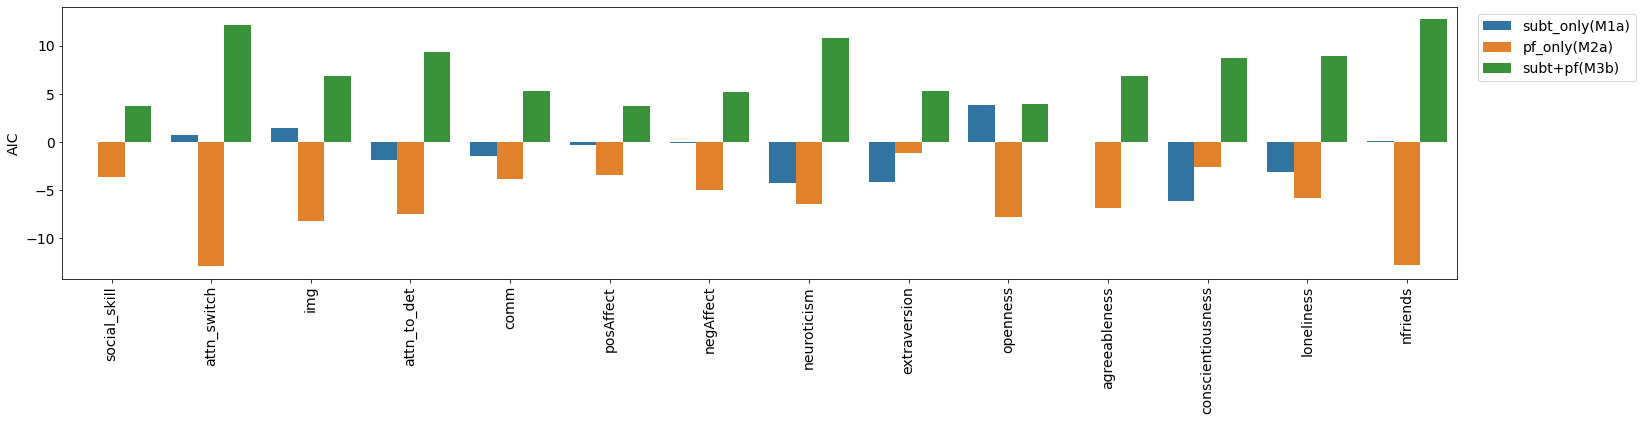

In [77]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(25,5))
sns.barplot(data=df_AIC,hue='model',y='AIC',x='traits')#,palette = palette)
plt.xticks(rotation = 90)
# plt.ylim(1300,2500)
plt.xlabel('')
plt.legend(bbox_to_anchor = [1.01,1])

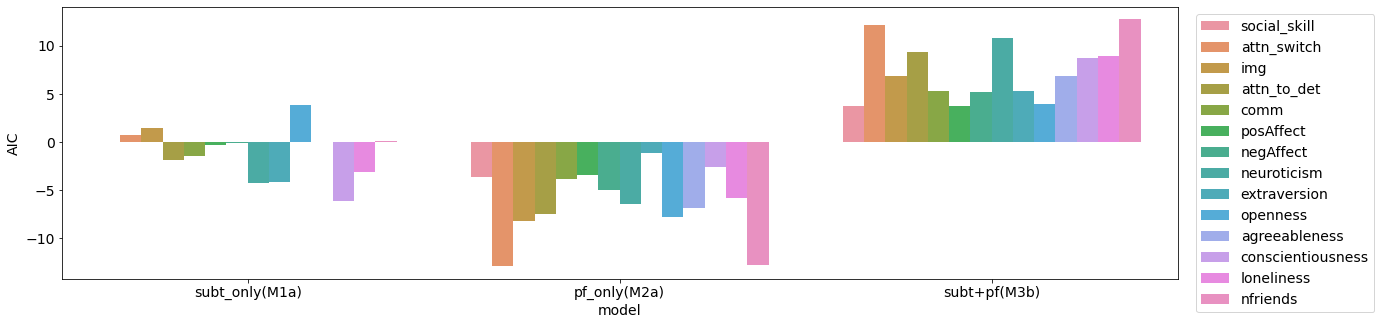

In [78]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
sns.barplot(data=df_AIC,x='model',y='AIC',hue='traits')
plt.legend(bbox_to_anchor = [1.01,1])

In [79]:
stats.ttest_rel(all_AICs[:,0],all_AICs[:,1]), (all_AICs[:,0]-all_AICs[:,1]).mean()

(Ttest_relResult(statistic=3.6395831589320564, pvalue=0.0029963558657462456),
 5.194953705942323)

In [80]:
stats.ttest_rel(all_AICs[:,0],all_AICs[:,2]), (all_AICs[:,0]-all_AICs[:,2]).mean()

(Ttest_relResult(statistic=-7.003746397661587, pvalue=9.289063330758107e-06),
 -8.502799398625582)

In [81]:
stats.ttest_rel(all_AICs[:,1],all_AICs[:,2]), (all_AICs[:,1]-all_AICs[:,2]).mean()

(Ttest_relResult(statistic=-8.510817847721446, pvalue=1.1283183648828942e-06),
 -13.697753104567905)

Text(0.5, 0, '')

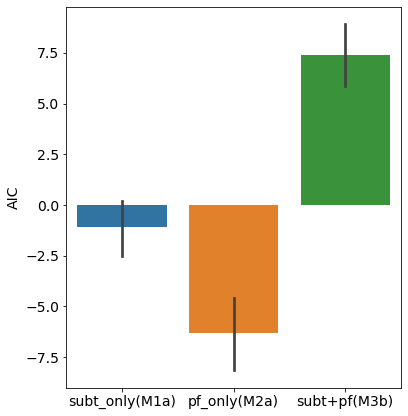

In [84]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,7))
sns.barplot(data=df_AIC,x='model',y='AIC')
# plt.ylim(1700,2100)
plt.xlabel('')

# plt.hlines(2070,0,2,color='grey')
# plt.text(1,2075,'***',ha='center')

# plt.hlines(2040,0,1,color='grey')
# plt.text(.5,2045,'**',ha='center')

# plt.hlines(2010,1,2,color='grey')
# plt.text(1.5,2015,'***',ha='center')

Text(0.5, 0, '')

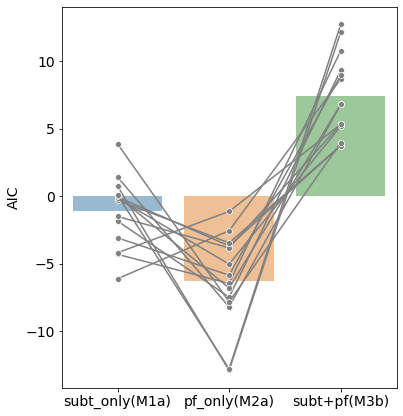

In [86]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,7))
for i in range(len(all_AICs)):
    sns.lineplot(x=range(3),y=all_AICs1[i,:],color='grey',marker='o')
sns.barplot(data=df_AIC,x='model',y='AIC',alpha=.5,ci=None)
# plt.ylim(1000,2500)
plt.xlabel('')

# plt.hlines(2070,0,2,color='grey')
# plt.text(1,2075,'***',ha='center')

# plt.hlines(2040,0,1,color='grey')
# plt.text(.5,2045,'**',ha='center')

# plt.hlines(2010,1,2,color='grey')
# plt.text(1.5,2015,'***',ha='center')

# Comparison 1b (drop sigma_subt)

In [90]:
all_AICs = np.full((traits.shape[0],3),np.nan)
for i,trait in enumerate(traits):
    # trait = traits[i]
    m1 = Lm(f'{trait} ~ PSE_subt*range_subt + PSE_subt*bias_subt + range_subt*bias_subt', data=df) # ff: anglesm rfx: subject ID
    m1.fit(summary=False)
    all_AICs[i,0] = m1.AIC

    m2 = Lm(f'{trait} ~ PSE_pf*slope_pf + PSE_pf*bias_pf + slope_pf*bias_pf', data=df) # ff: anglesm rfx: subject ID
    m2.fit(summary=False)
    all_AICs[i,1] = m2.AIC

    m3 = Lm(f'{trait} ~ PSE_subt*PSE_pf + PSE_subt*slope_pf + PSE_subt*bias_pf + range_subt*PSE_pf + range_subt*slope_pf + range_subt*bias_pf + bias_subt*PSE_pf + bias_subt*slope_pf + bias_subt*bias_pf', data=df) # ff: anglesm rfx: subject ID
    m3.fit(summary=False)
    all_AICs[i,2] = m3.AIC

all_AICs1 =  np.zeros_like(all_AICs)
for i in range(3):
    all_AICs1[:,i] = all_AICs[:,i] - all_AICs.mean(axis=1)

df_AIC = pd.DataFrame()
df_AIC['model'] = np.repeat(['subt_only(M1a)','pf_only(M2a)','subt+pf(M3b)'],len(traits))
df_AIC['traits'] = np.tile(traits,3)
df_AIC['AIC'] = 0
df_AIC.loc[df_AIC['model']=='subt_only(M1a)','AIC'] = all_AICs1[:,0]
df_AIC.loc[df_AIC['model']=='pf_only(M2a)','AIC'] = all_AICs1[:,1]
df_AIC.loc[df_AIC['model']=='subt+pf(M3b)','AIC'] = all_AICs1[:,2]
df_AIC.head()

,model,traits,AIC
0,subt_only(M1a),social_skill,-3.239054
1,subt_only(M1a),attn_switch,1.875475
2,subt_only(M1a),img,-1.386381
3,subt_only(M1a),attn_to_det,-3.796469
4,subt_only(M1a),comm,-3.812573


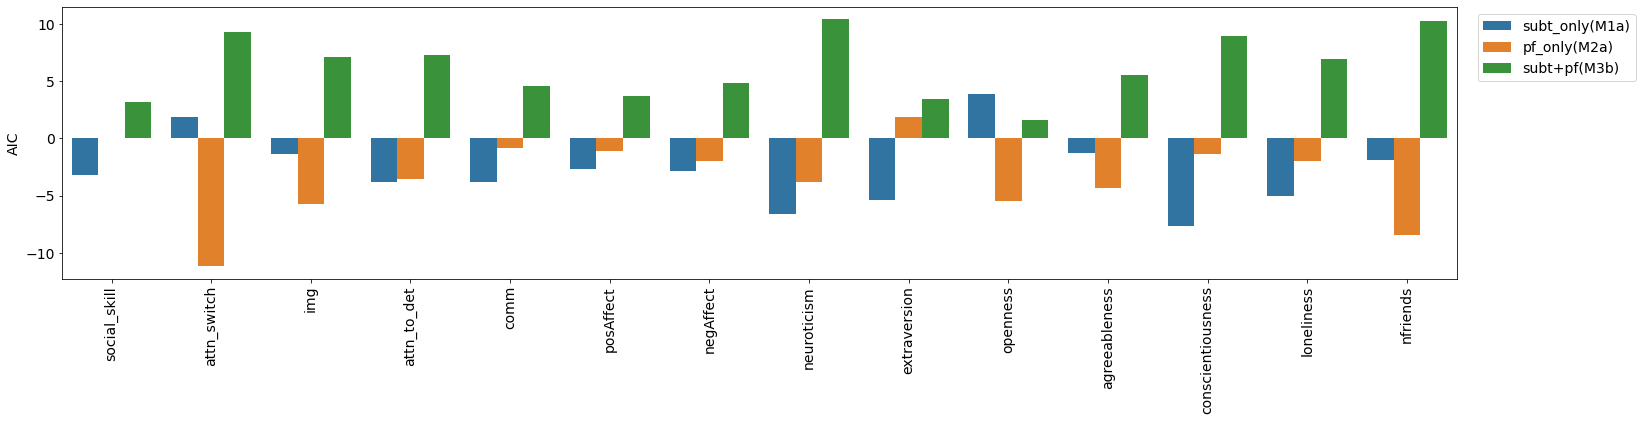

In [92]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(25,5))
sns.barplot(data=df_AIC,hue='model',y='AIC',x='traits')#,palette = palette)
plt.xticks(rotation = 90)
# plt.ylim(1300,2500)
plt.xlabel('')
plt.legend(bbox_to_anchor = [1.01,1])

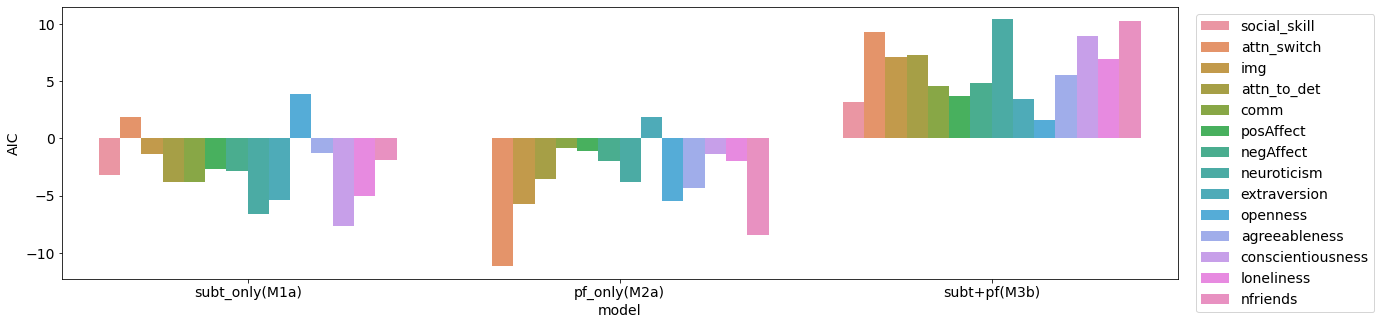

In [93]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
sns.barplot(data=df_AIC,x='model',y='AIC',hue='traits')
plt.legend(bbox_to_anchor = [1.01,1])

In [94]:
i,j = 0,1
stats.ttest_rel(all_AICs[:,i],all_AICs[:,j]), (all_AICs[:,i]-all_AICs[:,j]).mean()

(Ttest_relResult(statistic=0.35213742711264373, pvalue=0.7303780524524659),
 0.5584722022354397)

In [95]:
i,j = 0,2
stats.ttest_rel(all_AICs[:,i],all_AICs[:,j]), (all_AICs[:,i]-all_AICs[:,j]).mean()

(Ttest_relResult(statistic=-7.10603156374344, pvalue=7.9793676986508e-06),
 -9.087045276378408)

In [96]:
i,j = 1,2
stats.ttest_rel(all_AICs[:,i],all_AICs[:,j]), (all_AICs[:,i]-all_AICs[:,j]).mean()

(Ttest_relResult(statistic=-6.533246718654225, pvalue=1.9024640739982935e-05),
 -9.645517478613849)

Text(0.5, 0, '')

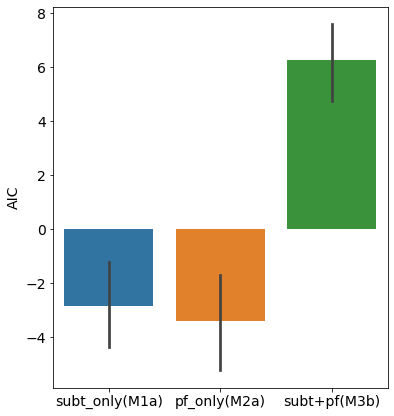

In [97]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,7))
sns.barplot(data=df_AIC,x='model',y='AIC')
# plt.ylim(1700,2100)
plt.xlabel('')

# plt.hlines(2070,0,2,color='grey')
# plt.text(1,2075,'***',ha='center')

# plt.hlines(2040,0,1,color='grey')
# plt.text(.5,2045,'**',ha='center')

# plt.hlines(2010,1,2,color='grey')
# plt.text(1.5,2015,'***',ha='center')

# Comparison 2 (only main effects)

In [100]:
all_AICs = np.full((traits.shape[0],3),np.nan)
for i,trait in enumerate(traits):
    # trait = traits[i]
    m1 = Lm(f'{trait} ~ PSE_subt + range_subt + bias_subt + sigma_subt', data=df) # ff: anglesm rfx: subject ID
    m1.fit(summary=False)
    all_AICs[i,0] = m1.AIC

    m2 = Lm(f'{trait} ~ PSE_pf + slope_pf + bias_pf', data=df) # ff: anglesm rfx: subject ID
    m2.fit(summary=False)
    all_AICs[i,1] = m2.AIC

    m3 = Lm(f'{trait} ~ PSE_subt + range_subt + bias_subt + sigma_subt + PSE_pf + slope_pf + bias_pf', data=df) # ff: anglesm rfx: subject ID
    m3.fit(summary=False)
    all_AICs[i,2] = m3.AIC

all_AICs1 =  np.zeros_like(all_AICs)
for i in range(3):
    all_AICs1[:,i] = all_AICs[:,i] - all_AICs.mean(axis=1)

df_AIC = pd.DataFrame()
df_AIC['model'] = np.repeat(['subt_only(M1a)','pf_only(M2a)','subt+pf(M3b)'],len(traits))
df_AIC['traits'] = np.tile(traits,3)
df_AIC['AIC'] = 0
df_AIC.loc[df_AIC['model']=='subt_only(M1a)','AIC'] = all_AICs1[:,0]
df_AIC.loc[df_AIC['model']=='pf_only(M2a)','AIC'] = all_AICs1[:,1]
df_AIC.loc[df_AIC['model']=='subt+pf(M3b)','AIC'] = all_AICs1[:,2]
df_AIC.head()

,model,traits,AIC
0,subt_only(M1a),social_skill,-2.048811
1,subt_only(M1a),attn_switch,2.975208
2,subt_only(M1a),img,2.445268
3,subt_only(M1a),attn_to_det,-0.498731
4,subt_only(M1a),comm,0.793051


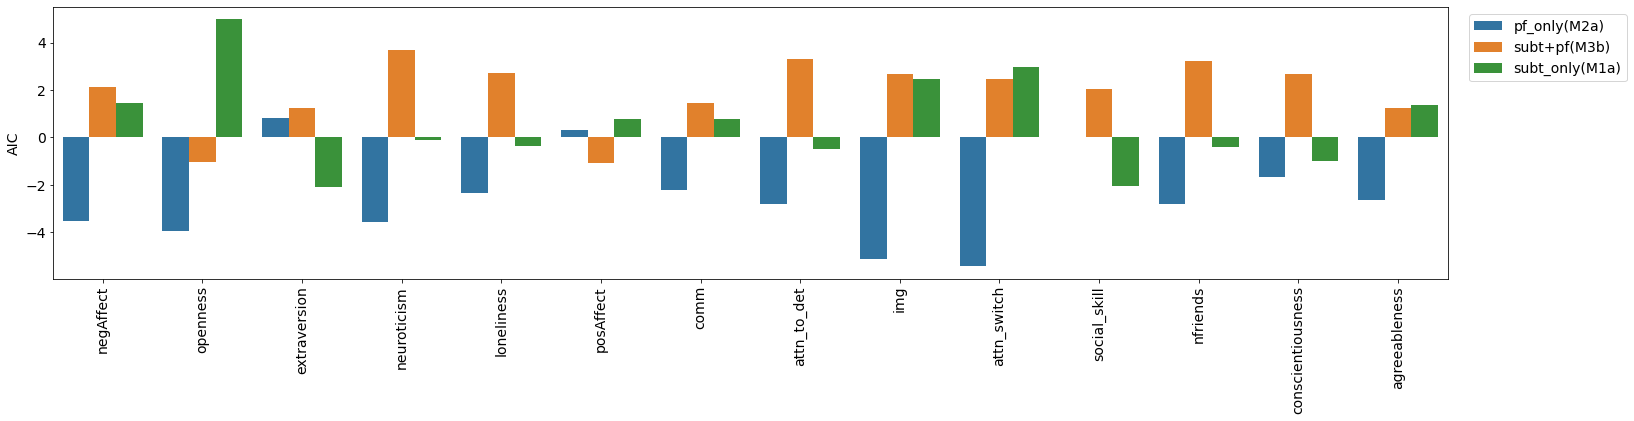

In [101]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(25,5))
sns.barplot(data=df_AIC.sort_values(by='model'),hue='model',y='AIC',x='traits')#,palette = palette)
plt.xticks(rotation = 90)
# plt.ylim(1500,2500)
plt.xlabel('')
plt.legend(bbox_to_anchor = [1.01,1])

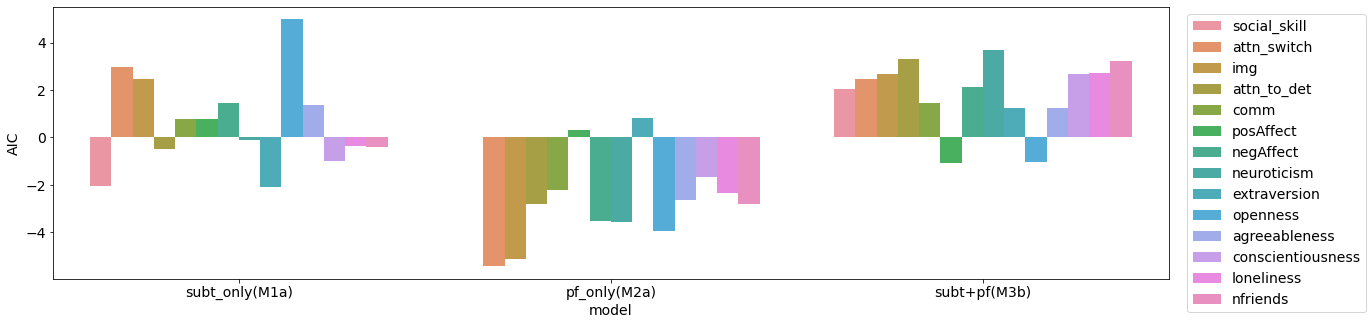

In [104]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
sns.barplot(data=df_AIC,x='model',y='AIC',hue='traits')
# plt.ylim(1000,2500)
plt.legend(bbox_to_anchor = [1.01,1])

In [105]:
i,j = 0,1
stats.ttest_rel(all_AICs[:,i],all_AICs[:,j]), (all_AICs[:,i]-all_AICs[:,j]).mean()

(Ttest_relResult(statistic=3.249836599492012, pvalue=0.0063302239000045555),
 3.0937940389543916)

In [106]:
i,j = 0,2
stats.ttest_rel(all_AICs[:,i],all_AICs[:,j]), (all_AICs[:,i]-all_AICs[:,j]).mean()

(Ttest_relResult(statistic=-1.6958585238084585, pvalue=0.11371348175687886),
 -1.3144135066845917)

In [107]:
i,j = 1,2
stats.ttest_rel(all_AICs[:,i],all_AICs[:,j]), (all_AICs[:,i]-all_AICs[:,j]).mean()

(Ttest_relResult(statistic=-6.0134219955171355, pvalue=4.3499186121859595e-05),
 -4.408207545638983)

Text(0.5, 0, '')

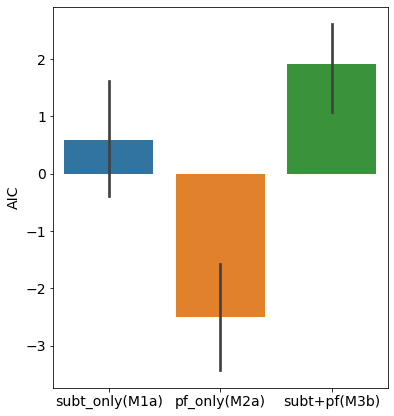

In [108]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,7))
sns.barplot(data=df_AIC,x='model',y='AIC')
# plt.ylim(1700,2100)
plt.xlabel('')

# plt.hlines(2070,0,2,color='grey')
# plt.text(1,2075,'.',ha='center')

# plt.hlines(2040,0,1,color='grey')
# plt.text(.5,2045,'**',ha='center')

# plt.hlines(2010,1,2,color='grey')
# plt.text(1.5,2015,'***',ha='center')

# Comparison 2b (drop sigma_subt)

In [109]:
all_AICs = np.full((traits.shape[0],3),np.nan)
for i,trait in enumerate(traits):
    # trait = traits[i]
    m1 = Lm(f'{trait} ~ PSE_subt + range_subt + bias_subt', data=df) # ff: anglesm rfx: subject ID
    m1.fit(summary=False)
    all_AICs[i,0] = m1.AIC

    m2 = Lm(f'{trait} ~ PSE_pf + slope_pf + bias_pf', data=df) # ff: anglesm rfx: subject ID
    m2.fit(summary=False)
    all_AICs[i,1] = m2.AIC

    m3 = Lm(f'{trait} ~ PSE_subt + range_subt + bias_subt + PSE_pf + slope_pf + bias_pf', data=df) # ff: anglesm rfx: subject ID
    m3.fit(summary=False)
    all_AICs[i,2] = m3.AIC

all_AICs1 =  np.zeros_like(all_AICs)
for i in range(3):
    all_AICs1[:,i] = all_AICs[:,i] - all_AICs.mean(axis=1)

df_AIC = pd.DataFrame()
df_AIC['model'] = np.repeat(['subt_only(M1a)','pf_only(M2a)','subt+pf(M3b)'],len(traits))
df_AIC['traits'] = np.tile(traits,3)
df_AIC['AIC'] = 0
df_AIC.loc[df_AIC['model']=='subt_only(M1a)','AIC'] = all_AICs1[:,0]
df_AIC.loc[df_AIC['model']=='pf_only(M2a)','AIC'] = all_AICs1[:,1]
df_AIC.loc[df_AIC['model']=='subt+pf(M3b)','AIC'] = all_AICs1[:,2]
df_AIC.head()

,model,traits,AIC
0,subt_only(M1a),social_skill,-2.654113
1,subt_only(M1a),attn_switch,2.311563
2,subt_only(M1a),img,1.807842
3,subt_only(M1a),attn_to_det,-1.092834
4,subt_only(M1a),comm,0.185848


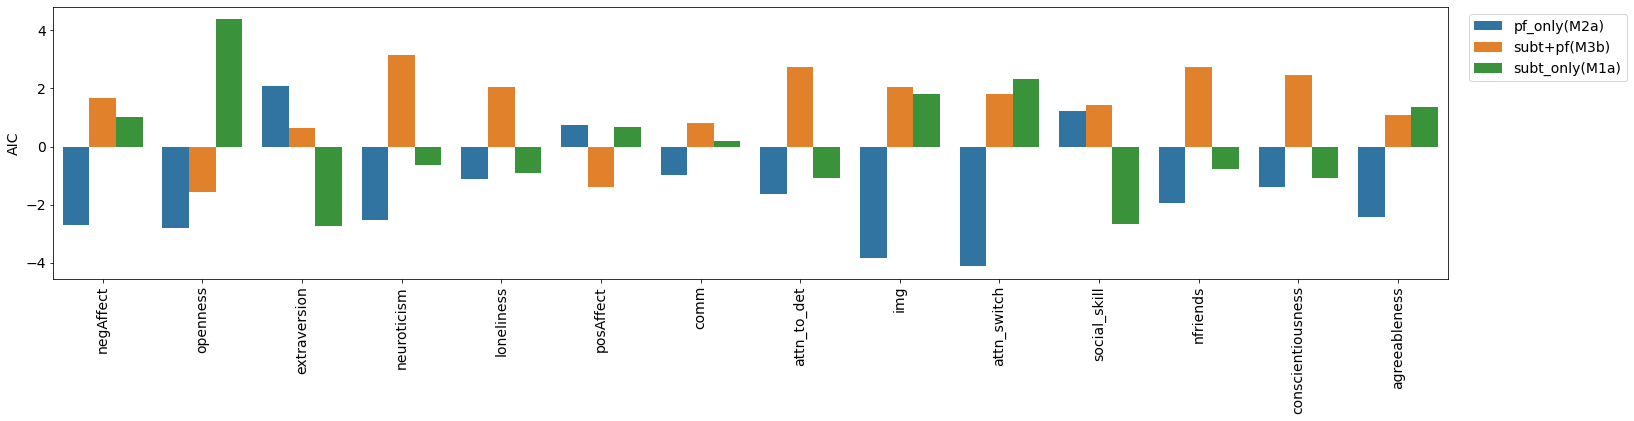

In [110]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(25,5))
sns.barplot(data=df_AIC.sort_values(by='model'),hue='model',y='AIC',x='traits')#,palette = palette)
plt.xticks(rotation = 90)
# plt.ylim(1000,2500)
plt.xlabel('')
plt.legend(bbox_to_anchor = [1.01,1])

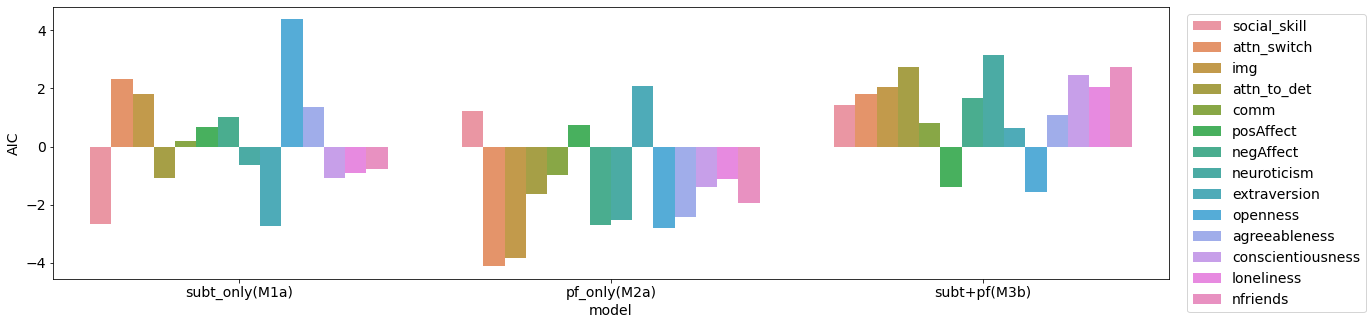

In [112]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
sns.barplot(data=df_AIC,x='model',y='AIC',hue='traits')
# plt.ylim(1000,2500)
plt.legend(bbox_to_anchor = [1.01,1])

In [113]:
i,j = 0,1
stats.ttest_rel(all_AICs[:,i],all_AICs[:,j]), (all_AICs[:,i]-all_AICs[:,j]).mean()

(Ttest_relResult(statistic=1.7810660597423489, pvalue=0.09826646165966908),
 1.6690373963037928)

In [114]:
i,j = 0,2
stats.ttest_rel(all_AICs[:,i],all_AICs[:,j]), (all_AICs[:,i]-all_AICs[:,j]).mean()

(Ttest_relResult(statistic=-1.6492469203198592, pvalue=0.12303855432731306),
 -1.27575124726861)

In [115]:
i,j = 1,2
stats.ttest_rel(all_AICs[:,i],all_AICs[:,j]), (all_AICs[:,i]-all_AICs[:,j]).mean()

(Ttest_relResult(statistic=-4.182161271709905, pvalue=0.0010747157515330712),
 -2.9447886435724024)

Text(0.5, 0, '')

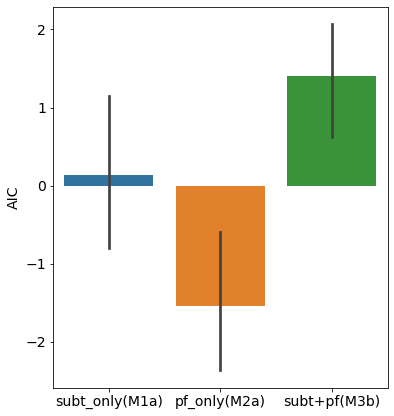

In [119]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,7))
sns.barplot(data=df_AIC,x='model',y='AIC')
# plt.ylim(1700,2100)
plt.xlabel('')

# # plt.hlines(2070,0,2,color='grey')
# # plt.text(1,2075,'.',ha='center')

# plt.hlines(2040,0,1,color='grey')
# plt.text(.5,2045,'.',ha='center')

# plt.hlines(2010,1,2,color='grey')
# plt.text(1.5,2015,'***',ha='center')

# Comparison 3

In [120]:
traits1 = traits[[0,4,5,7,8,12]]

In [121]:
traits1

Index(['social_skill', 'comm', 'posAffect', 'neuroticism', 'extraversion',
       'loneliness'],
      dtype='object')

In [124]:
all_AICs = np.full((traits1.shape[0],3),np.nan)
for i,trait in enumerate(traits1):
    # trait = traits[i]
    m1 = Lm(f'{trait} ~ PSE_subt + range_subt + bias_subt', data=df) # ff: anglesm rfx: subject ID
    m1.fit(summary=False)
    all_AICs[i,0] = m1.AIC

    m2 = Lm(f'{trait} ~ PSE_pf + slope_pf + bias_pf', data=df) # ff: anglesm rfx: subject ID
    m2.fit(summary=False)
    all_AICs[i,1] = m2.AIC

    m3 = Lm(f'{trait} ~ PSE_subt + range_subt + bias_subt + PSE_pf + slope_pf + bias_pf', data=df) # ff: anglesm rfx: subject ID
    m3.fit(summary=False)
    all_AICs[i,2] = m3.AIC

all_AICs1 =  np.zeros_like(all_AICs)
for i in range(3):
    all_AICs1[:,i] = all_AICs[:,i] - all_AICs.mean(axis=1)

df_AIC = pd.DataFrame()
df_AIC['model'] = np.repeat(['subt_only(M1a)','pf_only(M2a)','subt+pf(M3b)'],len(traits1))
df_AIC['traits'] = np.tile(traits1,3)
df_AIC['AIC'] = 0
df_AIC.loc[df_AIC['model']=='subt_only(M1a)','AIC'] = all_AICs1[:,0]
df_AIC.loc[df_AIC['model']=='pf_only(M2a)','AIC'] = all_AICs1[:,1]
df_AIC.loc[df_AIC['model']=='subt+pf(M3b)','AIC'] = all_AICs1[:,2]
df_AIC.head()

,model,traits,AIC
0,subt_only(M1a),social_skill,-2.654113
1,subt_only(M1a),comm,0.185848
2,subt_only(M1a),posAffect,0.656801
3,subt_only(M1a),neuroticism,-0.623289
4,subt_only(M1a),extraversion,-2.736996


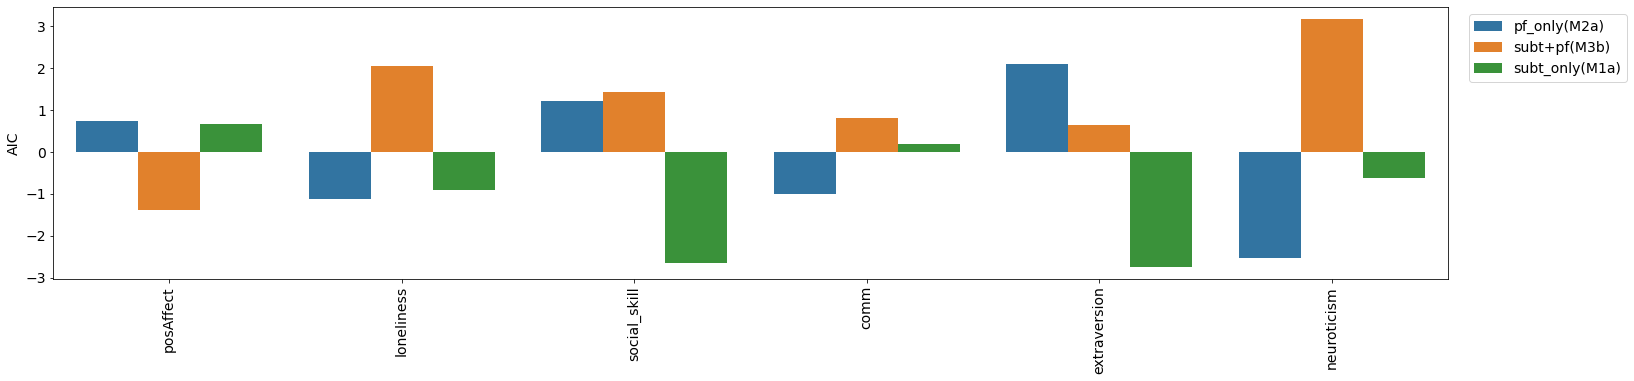

In [125]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(25,5))
sns.barplot(data=df_AIC.sort_values(by='model'),hue='model',y='AIC',x='traits')#,palette = palette)
plt.xticks(rotation = 90)
# plt.ylim(1200,2500)
plt.xlabel('')
plt.legend(bbox_to_anchor = [1.01,1])

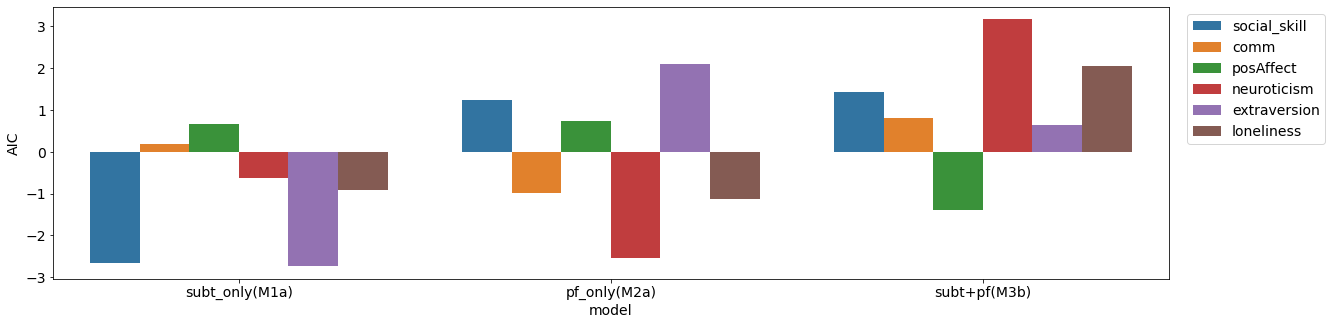

In [126]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
sns.barplot(data=df_AIC,x='model',y='AIC',hue='traits')
# plt.ylim(1000,2500)
plt.legend(bbox_to_anchor = [1.01,1])

Text(0.5, 0, '')

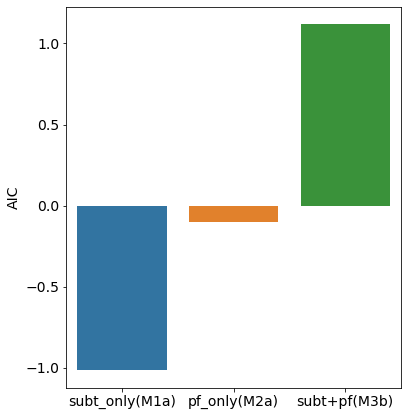

In [127]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,7))
sns.barplot(data=df_AIC,x='model',y='AIC',ci = None)
# plt.ylim(1900,2000)
plt.xlabel('')

# plt.hlines(2070,0,2,color='grey')
# plt.text(1,2075,'.',ha='center')

# plt.hlines(2040,0,1,color='grey')
# plt.text(.5,2045,'.',ha='center')

# plt.hlines(2010,1,2,color='grey')
# plt.text(1.5,2015,'***',ha='center')